In [204]:
import pandas as pd 
import csv 

path_fichier1 = r'C:\Users\alain\Downloads\ProjetML\train.csv'
df1 = pd.read_csv(path_fichier1, sep=',')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# données d'entrainement 

In [205]:
print(df1[['SalePrice']].head())

   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


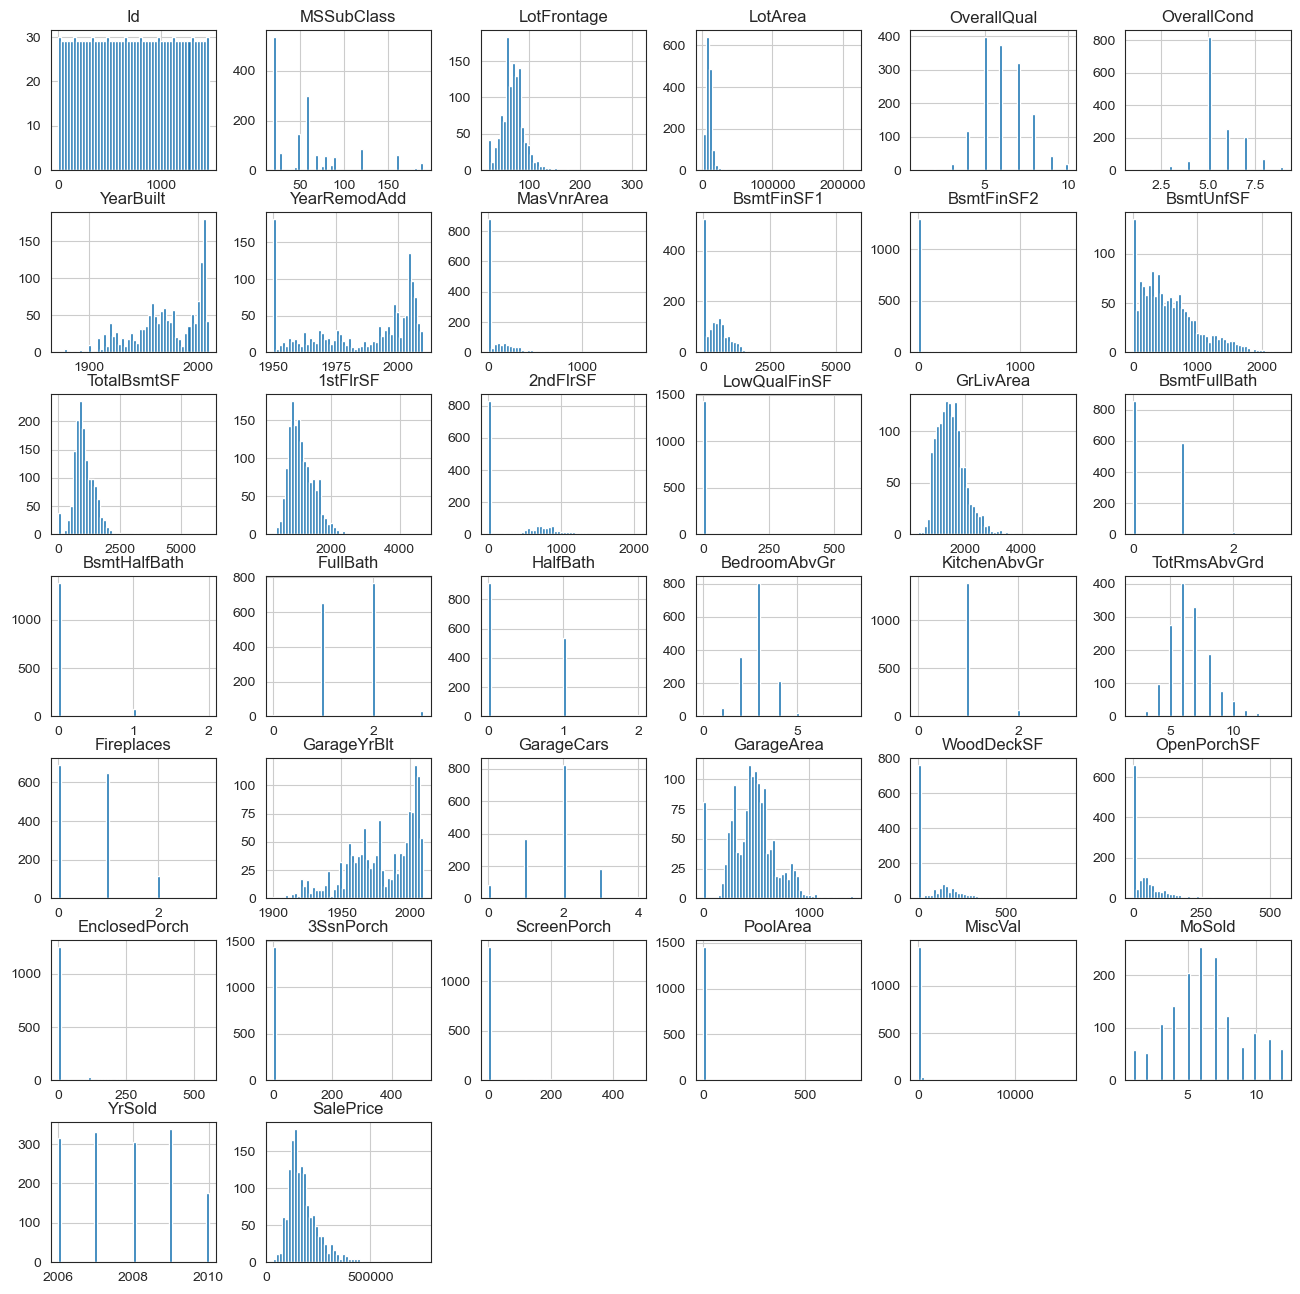

In [209]:
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(16,16))
plt.show()

In [210]:
#Nombre de valeurs manquantes dans chaque colonne
total = df1.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=["Total"])
display(missing_data.head(45))

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [211]:
df1["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [212]:
df1_SalePrice=pd.DataFrame({"SalePrice": df1["SalePrice"]})

In [213]:
df1_SalePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [214]:
df1=df1.drop("SalePrice", axis=1)

In [215]:
from sklearn.impute import SimpleImputer


# Pour les variables numériques
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='median')
df1[num_cols] = imputer_num.fit_transform(df1[num_cols])

# Pour les variables catégorielles
cat_cols = df1.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')
df1[cat_cols] = imputer_cat.fit_transform(df1[cat_cols])

In [216]:
df1[num_cols]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [217]:
df1[cat_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1,RL,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
2,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
3,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
4,RL,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1456,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,missing,MnPrv,missing,WD,Normal
1457,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,missing,missing,missing,WD,Normal


In [218]:
print("données manquantes après nettoyage:")
print(df1.isnull().sum())

données manquantes après nettoyage:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [221]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Normalisation et standardisation des variables numériques
df1[num_cols] = scaler.fit_transform(df1[num_cols])
# One-Hot Encoding pour des caractéristiques nominales
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)#.astype(int)

In [222]:
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,...,False,False,False,False,True,False,False,False,True,False
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,...,False,False,False,False,True,False,False,False,True,False
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,...,False,False,False,False,True,False,False,False,True,False
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,...,False,False,False,False,True,False,False,False,False,False
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,...,False,False,False,False,True,False,False,False,True,False
1456,0.997944,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,...,False,False,False,False,True,False,False,False,True,False
1457,0.998629,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,...,False,False,False,False,True,False,False,False,True,False
1458,0.999315,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,...,False,False,False,False,True,False,False,False,True,False


In [223]:
df1["SalePrice"]=df1_SalePrice["SalePrice"]

In [224]:
df1["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [225]:
#Nombre de valeurs manquantes dans chaque colonne
total = df1.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=["Total"])
display(missing_data.head(45))

,Total
Id,0
BsmtQual_Gd,0
BsmtQual_missing,0
BsmtCond_Gd,0
BsmtCond_Po,0
BsmtCond_TA,0
BsmtCond_missing,0
BsmtExposure_Gd,0
BsmtExposure_Mn,0
BsmtExposure_No,0


In [226]:
df1["SalePrice"].isna().sum()

0

In [227]:
df1.fillna(0, inplace=True)
df1 = df1.drop("Id",axis=1)
df1.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SalePrice'],
      dtype='object', length=261)

In [228]:
#Ce calcul de correlation rejoint les boites a moustaches calculees plus haut 
numeric_df = df1.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


## Données TEST

In [229]:
path_fichier2 = r'C:\Users\alain\Downloads\ProjetML\test.csv'
df2 = pd.read_csv(path_fichier2, sep=',')
df2 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [230]:
# Création d'un DataFrame df2_ID avec la colonne 'Id' de df2
df2_ID=pd.DataFrame({"Id":df2["Id"]})

In [231]:
df2_ID

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [232]:
df2=df2.drop("Id", axis=1)

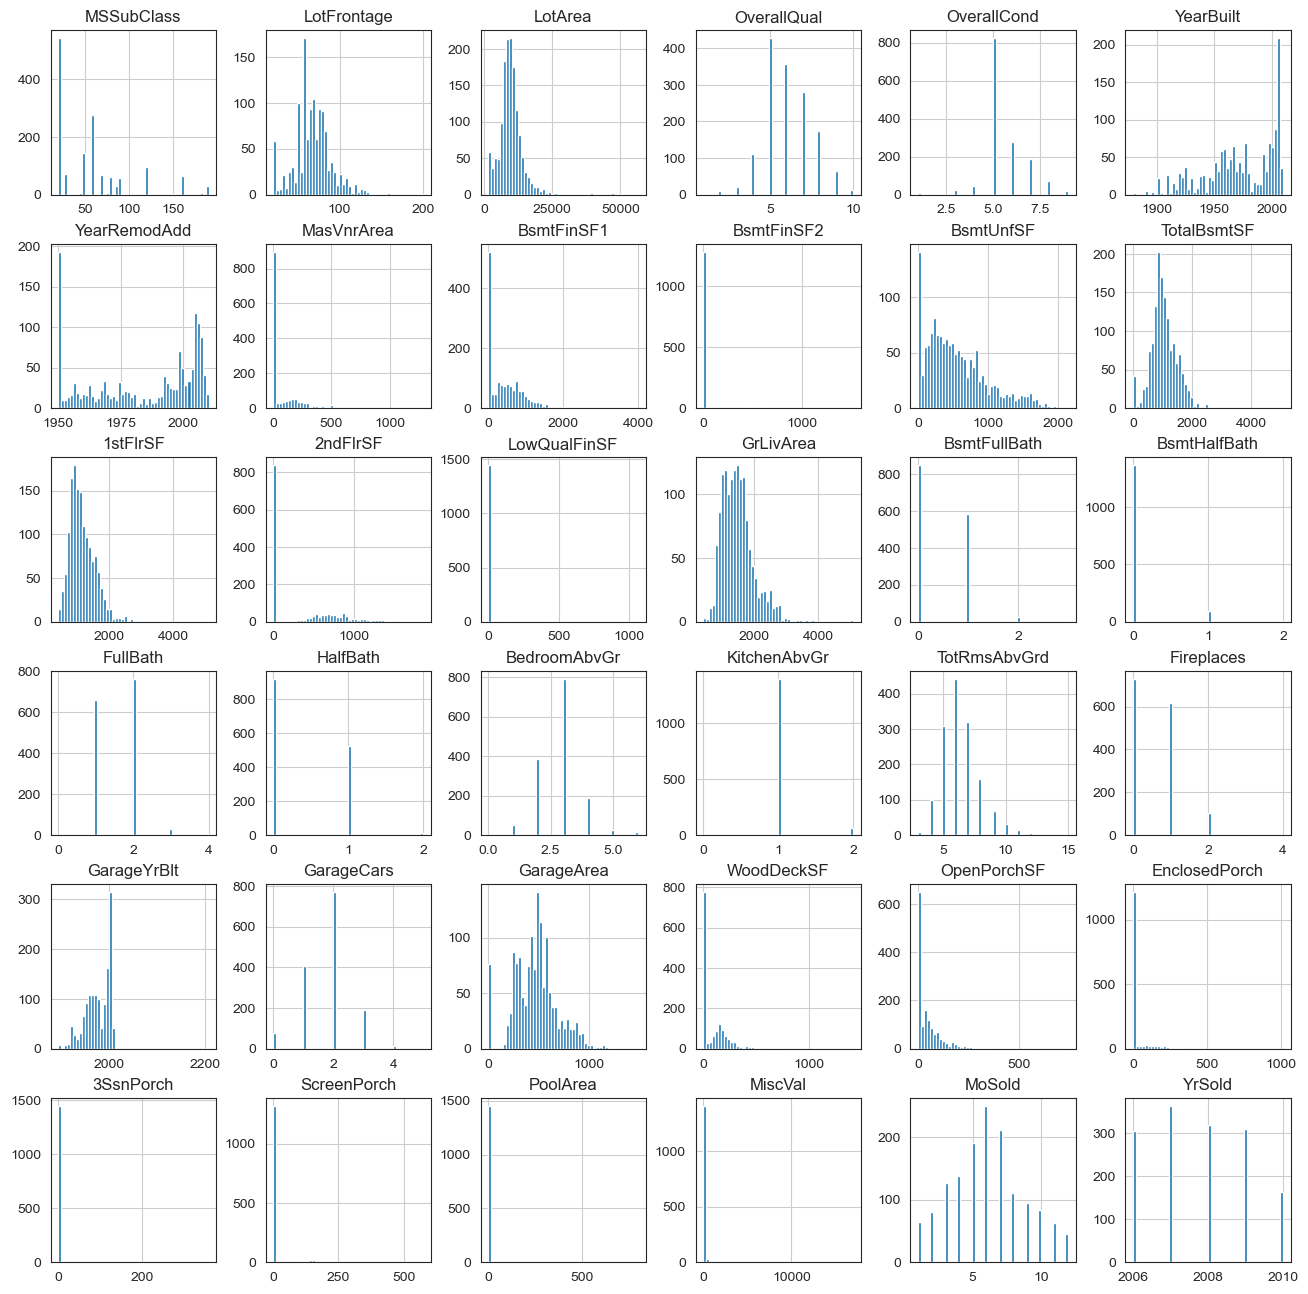

In [233]:
df2.hist(bins=50, figsize=(16,16))
plt.show()

In [234]:
df2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [235]:
#Nombre de valeurs manquantes dans chaque colonne
total_df2 = df2.isna().sum().sort_values(ascending=False)
missing_data_df2 = pd.concat([total_df2], axis=1, keys=["Total_missing"])
display(missing_data_df2.head(40))

,Total_missing
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageFinish,78
GarageQual,78


In [236]:
# Pour les variables numériques
num_cols = df2.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='median')
df2[num_cols] = imputer_num.fit_transform(df2[num_cols])

# Pour les variables catégorielles
cat_cols = df2.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')
df2[cat_cols] = imputer_cat.fit_transform(df2[cat_cols])

In [237]:
df2[cat_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,missing,MnPrv,missing,WD,Normal
1,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,missing,missing,Gar2,WD,Normal
2,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,missing,MnPrv,missing,WD,Normal
3,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,missing,missing,missing,WD,Normal
4,RL,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,missing,missing,missing,missing,Y,missing,missing,missing,WD,Normal
1455,RM,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
1456,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
1457,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,missing,missing,missing,missing,Y,missing,MnPrv,Shed,WD,Normal


In [238]:
df2[num_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0


In [239]:
#Normalisation et standardisation des variables numériques
df2[num_cols] = scaler.fit_transform(df2[num_cols])
# One-Hot Encoding pour des caractéristiques nominales
df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)#.astype(int)

In [240]:
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_missing,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,...,False,False,False,True,False,False,False,False,True,False
1,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,...,False,False,False,True,False,False,False,False,True,False
2,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,...,False,False,False,True,False,False,False,False,True,False
3,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,...,False,False,False,True,False,False,False,False,True,False
4,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False
1455,0.823529,0.000000,0.007691,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,0.000000,...,False,False,False,True,False,False,False,False,False,False
1456,0.000000,0.776536,0.336115,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,0.000000,...,False,False,False,True,False,False,False,False,False,False
1457,0.382353,0.229050,0.162724,0.444444,0.500,0.862595,0.700000,0.000000,0.084040,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [241]:
#Nombre de valeurs manquantes dans chaque colonne
total = df2.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=["Total"])
display(missing_data.head(45))

,Total
MSSubClass,0
BsmtFinType1_Unf,0
BsmtQual_missing,0
BsmtCond_Gd,0
BsmtCond_Po,0
BsmtCond_TA,0
BsmtCond_missing,0
BsmtExposure_Gd,0
BsmtExposure_Mn,0
BsmtExposure_No,0


In [242]:
#Ce calcul de correlation rejoint les boites a moustaches calculees plus haut 
numeric_df = df2.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.424607,-0.359537,0.034690,-0.071768,0.040848,0.046319,-0.011034,-0.058642,-0.078891,...,-0.107990,-0.022539,-0.025421,-0.029051,-0.029709,-0.071978,-0.017790,-0.045835,0.011366,-0.008392
LotFrontage,-0.424607,1.000000,0.533728,0.171886,-0.083418,0.114234,0.087094,0.223856,0.188299,0.039751,...,0.353075,0.134720,0.168626,0.012665,-0.033861,0.104117,0.134824,0.067923,0.008686,-0.023505
LotArea,-0.359537,0.533728,1.000000,0.107989,-0.103402,0.048314,0.036907,0.187449,0.185534,0.054346,...,0.315835,0.158483,0.164815,0.099850,-0.001846,0.088712,0.140494,0.139071,0.005152,-0.051144
OverallQual,0.034690,0.171886,0.107989,1.000000,-0.095874,0.621910,0.591267,0.445778,0.322541,-0.027883,...,0.568033,0.270790,0.288367,-0.161339,0.002803,0.022334,-0.012330,0.033784,-0.008764,-0.012291
OverallCond,-0.071768,-0.083418,-0.103402,-0.095874,1.000000,-0.361027,0.021668,-0.140927,-0.054861,0.042818,...,-0.156752,0.043058,-0.103783,0.072178,0.071285,0.033146,-0.037191,0.007236,-0.009767,0.015649
YearBuilt,0.040848,0.114234,0.048314,0.621910,-0.361027,1.000000,0.631696,0.303491,0.309629,-0.008001,...,0.482041,0.233889,0.208040,-0.363012,-0.005442,-0.031984,-0.001060,0.007325,0.015599,-0.011006
YearRemodAdd,0.046319,0.087094,0.036907,0.591267,0.021668,0.631696,1.000000,0.206497,0.175277,-0.055944,...,0.381981,0.230724,0.258049,-0.243582,0.025823,-0.053761,-0.034862,0.003011,0.011771,0.029715
MasVnrArea,-0.011034,0.223856,0.187449,0.445778,-0.140927,0.303491,0.206497,1.000000,0.342542,0.038641,...,0.371149,0.173242,0.159308,-0.111343,0.006282,0.070957,-0.005051,0.106084,0.001575,-0.027739
BsmtFinSF1,-0.058642,0.188299,0.185534,0.322541,-0.054861,0.309629,0.175277,0.342542,1.000000,-0.059480,...,0.323825,0.242419,0.136390,-0.097387,0.088252,0.131448,0.012096,0.165413,0.013498,0.030754
BsmtFinSF2,-0.078891,0.039751,0.054346,-0.027883,0.042818,-0.008001,-0.055944,0.038641,-0.059480,1.000000,...,0.022559,0.126154,-0.014039,0.029081,-0.014454,0.039865,0.050162,-0.012789,-0.003004,-0.011784


## 1- Ridge Regression 

In [243]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [244]:
# Séparation des features et de la variable cible dans l'ensemble d'entraînement
X_train = df1.drop('SalePrice', axis=1)
y_train = df1['SalePrice']

In [245]:
# Suppression des colonnes supplémentaires dans df2 qui ne sont pas présentes dans X_train
columns_to_keep_df2 = set(X_train.columns).intersection(set(df2.columns))
df2 = df2[list(columns_to_keep_df2)]

In [246]:
# Vérification si des colonnes manquantes dans df2
missing_columns_df2 = set(X_train.columns) - set(df2.columns)
if missing_columns_df2:
    print(f"Colonnes manquantes dans df2 : {missing_columns_df2}")

Colonnes manquantes dans df2 : {'Electrical_missing', 'Condition2_RRAe', 'Exterior1st_Stone', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_GasA', 'GarageQual_Fa', 'RoofMatl_Roll', 'Condition2_RRNn', 'Utilities_NoSeWa', 'HouseStyle_2.5Fin', 'RoofMatl_Membran', 'RoofMatl_CompShg', 'Electrical_Mix', 'PoolQC_Fa', 'Condition2_RRAn', 'RoofMatl_Metal', 'MiscFeature_TenC', 'Heating_OthW'}


In [247]:
# Suppression des colonnes supplémentaires dans X_train qui ne sont pas présentes dans df2
columns_to_keep_X_train = set(df2.columns).intersection(set(X_train.columns))
X_train = X_train[list(columns_to_keep_X_train)]

In [248]:
# Vérification si des colonnes manquantes dans X_train
missing_columns_X_train = set(df2.columns) - set(X_train.columns)
if missing_columns_X_train:
    print(f"Colonnes manquantes dans X_train : {missing_columns_X_train}")

In [249]:
df2

,BldgType_TwnhsE,HeatingQC_Po,FireplaceQu_Po,GarageCond_Gd,Neighborhood_Gilbert,Electrical_SBrkr,MasVnrType_Stone,BsmtQual_missing,SaleType_CWD,Condition1_PosA,...,RoofMatl_Tar&Grv,MasVnrType_missing,Neighborhood_NPkVill,BsmtFinType1_Unf,FireplaceQu_missing,Neighborhood_BrDale,GarageType_missing,Neighborhood_Timber,GarageCars,Condition1_Norm
0,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,0.2,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,0.2,True
2,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,0.4,True
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.4,True
4,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,0.4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,True,False,True,False,0.0,True
1455,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,0.2,True
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,0.4,True
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,True,False,0.0,True


In [250]:
X_train

,BldgType_TwnhsE,HeatingQC_Po,FireplaceQu_Po,GarageCond_Gd,Neighborhood_Gilbert,Electrical_SBrkr,MasVnrType_Stone,BsmtQual_missing,SaleType_CWD,Condition1_PosA,...,RoofMatl_Tar&Grv,MasVnrType_missing,Neighborhood_NPkVill,BsmtFinType1_Unf,FireplaceQu_missing,Neighborhood_BrDale,GarageType_missing,Neighborhood_Timber,GarageCars,Condition1_Norm
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,0.50,True
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,0.50,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.50,True
3,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,0.75,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.75,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,True,True,False,False,False,False,...,False,True,False,True,False,False,False,False,0.50,True
1456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,0.50,True
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,0.25,True
1458,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,0.25,True


In [251]:
# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [252]:
# Division de l'ensemble d'entraînement pour la validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [253]:
# Entraînement du modèle Ridge avec recherche des hyperparamètres optimaux
ridge = Ridge()
params = {'alpha': np.logspace(-4, 4, 9)}
grid_ridge = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train_split, y_train_split)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error')

In [254]:
# Meilleur alpha pour Ridge
best_alpha_ridge = grid_ridge.best_params_['alpha']
print(f"Meilleur alpha pour Ridge : {best_alpha_ridge}")

Meilleur alpha pour Ridge : 1000.0


In [255]:
# Entraînement du modèle Ridge avec le meilleur alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_split, y_train_split)

Ridge(alpha=1000.0)

In [256]:
# Affichage des coefficients
coefficients_ridge = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_model.coef_})
print(coefficients_ridge.sort_values(by='Coefficient', ascending=False))

                  Feature  Coefficient
25            OverallQual  7181.326932
186             GrLivArea  6499.868317
189  Neighborhood_NridgHt  4871.899038
144          TotRmsAbvGrd  4661.293711
94               1stFlrSF  4628.674099
..                    ...          ...
80            BsmtQual_Gd -2588.633083
201       Condition2_PosN -2619.000207
140          ExterQual_TA -2991.386004
52         KitchenQual_TA -3020.280017
137             PoolQC_Gd -4184.235146

[241 rows x 2 columns]


In [257]:
# Évaluation du modèle Ridge sur l'ensemble de validation
ridge_predictions_val = ridge_model.predict(X_val_split)
ridge_rmse = np.sqrt(mean_squared_error(y_val_split, ridge_predictions_val))
print(f'RMSE pour Ridge sur l\'ensemble de validation : {ridge_rmse}')

RMSE pour Ridge sur l'ensemble de validation : 35030.93472530693


In [258]:
#PHASE DE TEST
X_test_scaled = scaler.transform(df2)
# Prédictions sur l'ensemble de test
predictions_test = ridge_model.predict(X_test_scaled)
# Création d'un DataFrame pour les prédictions avec un identifiant unique
sample_submission_df = pd.DataFrame({'Id': df2_ID['Id'], 'SalePrice': predictions_test})
# Sauvegarde du fichier de soumission
sample_submission_df.to_csv('C:/Users/alain/Downloads/ProjetML/sample_submission_ridge.csv', index=False)

In [259]:
# Calcul des résidus
ridge_residuals = y_val_split - ridge_predictions_val

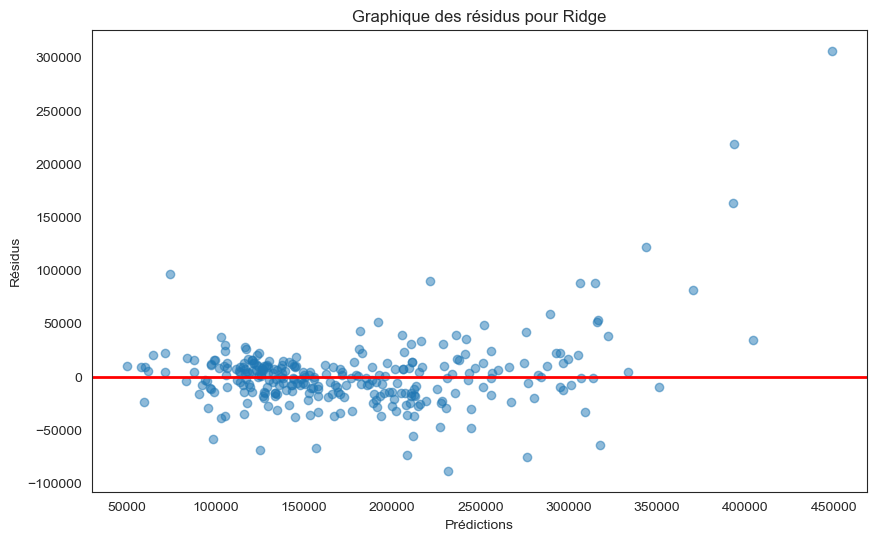

In [260]:
# Tracé du graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(ridge_predictions_val, ridge_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Graphique des résidus pour Ridge')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

Le graphique des résidus pour le modèle de régression Ridge indique que les résidus sont relativement bien répartis autour de la ligne horizontale y=0, sans motifs apparents qui indiqueraient un biais systématique dans les prédictions du modèle. La dispersion des points est assez uniforme, suggérant que la variance des erreurs est à peu près constante. Cependant, il y a quelques outliers, en particulier pour les valeurs prédites plus élevées, qui pourraient influencer le modèle et pourraient nécessiter une enquête plus détaillée.La majorité des résidus sont proches de zéro, ce qui suggère que le modèle Ridge fait des prédictions assez précises.

## 2- Lasso

In [261]:
# Entraînement du modèle Lasso avec recherche des hyperparamètres optimaux
lasso = Lasso()
params = {'alpha': np.logspace(-4, 4, 9)}
grid_lasso = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_train_split, y_train_split)

C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+11, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.631e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+11, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error')

In [262]:
# Meilleur alpha pour Lasso
best_alpha_lasso = grid_lasso.best_params_['alpha']
print(f"Meilleur alpha pour Lasso : {best_alpha_lasso}")

Meilleur alpha pour Lasso : 1000.0


In [263]:
# Entraînement du modèle Lasso avec le meilleur alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train_split, y_train_split)

Lasso(alpha=1000.0)

In [264]:
# Affichage des coefficients
coefficients_lasso = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_model.coef_})
print(coefficients_lasso.sort_values(by='Coefficient', ascending=False))

                  Feature   Coefficient
186             GrLivArea  24009.155660
25            OverallQual  15632.457864
189  Neighborhood_NridgHt   7999.038266
128             YearBuilt   6243.057573
239            GarageCars   5662.766179
..                    ...           ...
201       Condition2_PosN  -5327.893783
218        KitchenQual_Gd  -5680.814018
59             MSSubClass  -5870.584612
52         KitchenQual_TA  -6024.947474
137             PoolQC_Gd -10851.602605

[241 rows x 2 columns]


In [265]:
# Évaluation du modèle Lasso sur l'ensemble de validation
lasso_predictions_val = lasso_model.predict(X_val_split)
lasso_rmse = np.sqrt(mean_squared_error(y_val_split, lasso_predictions_val))
print(f'RMSE pour Lasso sur l\'ensemble de validation : {lasso_rmse}')

RMSE pour Lasso sur l'ensemble de validation : 33434.67697302809


In [266]:
X_test_scaled = scaler.transform(df2)
# Prédictions sur l'ensemble de test
predictions_test = lasso_model.predict(X_test_scaled)
# Création d'un DataFrame pour les prédictions avec un identifiant unique
sample_submission_df = pd.DataFrame({'Id': df2_ID['Id'], 'SalePrice': predictions_test})
# Sauvegarde du fichier de soumission
sample_submission_df.to_csv('C:/Users/alain/Downloads/ProjetML/sample_submission_lasso.csv', index=False)

In [267]:
# Calcul des résidus pour Lasso
lasso_residuals = y_val_split - lasso_predictions_val

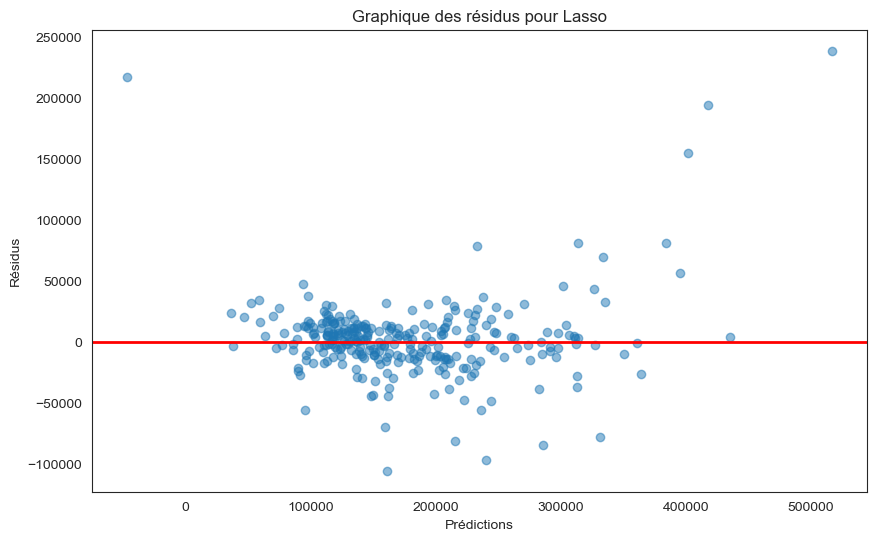

In [268]:
# Tracé du graphique des résidus pour Lasso
plt.figure(figsize=(10, 6))
plt.scatter(lasso_predictions_val, lasso_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Graphique des résidus pour Lasso')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

Le graphique des résidus pour le modèle Lasso montre une distribution des erreurs autour de la ligne de résidu zéro, ce qui suggère que le modèle ne présente pas de biais systématique évident. La dispersion des résidus est relativement uniforme, ce qui indique que la variance des erreurs est stable et que le modèle a une performance cohérente sur les différentes valeurs prédites. Cependant, la présence de certains points éloignés de la ligne zéro suggère l'existence de valeurs aberrantes ou de prédictions inexactes pour certaines observations mais globalement, le modèle semble performant.

## 3- SVM

In [269]:
from sklearn.svm import SVR

# Entraînement du modèle SVM avec recherche des hyperparamètres optimaux
svm = SVR()
params_svm = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2]}
grid_svm = GridSearchCV(svm, params_svm, scoring='neg_mean_squared_error', cv=5)
grid_svm.fit(X_train_split, y_train_split)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2]},
             scoring='neg_mean_squared_error')

In [270]:
# Meilleurs paramètres pour SVM
best_C_svm = grid_svm.best_params_['C']
best_epsilon_svm = grid_svm.best_params_['epsilon']
print(f"Meilleurs paramètres pour SVM - C: {best_C_svm}, Epsilon: {best_epsilon_svm}")

Meilleurs paramètres pour SVM - C: 10, Epsilon: 0.01


In [271]:
# Entraînement du modèle SVM avec les meilleurs paramètres
svm_model = SVR(C=best_C_svm, epsilon=best_epsilon_svm)
svm_model.fit(X_train_split, y_train_split)

SVR(C=10, epsilon=0.01)

In [272]:
# Évaluation du modèle SVM sur l'ensemble de validation
svm_predictions_val = svm_model.predict(X_val_split)
svm_rmse = np.sqrt(mean_squared_error(y_val_split, svm_predictions_val))
print(f'RMSE pour SVM sur l\'ensemble de validation : {svm_rmse}')

RMSE pour SVM sur l'ensemble de validation : 88463.63966531791


In [273]:
X_test_scaled = scaler.transform(df2)
# Prédictions sur l'ensemble de test
predictions_test = svm_model.predict(X_test_scaled)
# Création d'un DataFrame pour les prédictions avec un identifiant unique
sample_submission_df = pd.DataFrame({'Id': df2_ID['Id'], 'SalePrice': predictions_test})
# Sauvegarde du fichier de soumission
sample_submission_df.to_csv('C:/Users/alain/Downloads/ProjetML/sample_submission_svm.csv', index=False)

In [274]:
# Calcul des résidus pour SVM
svm_residuals = y_val_split - svm_predictions_val

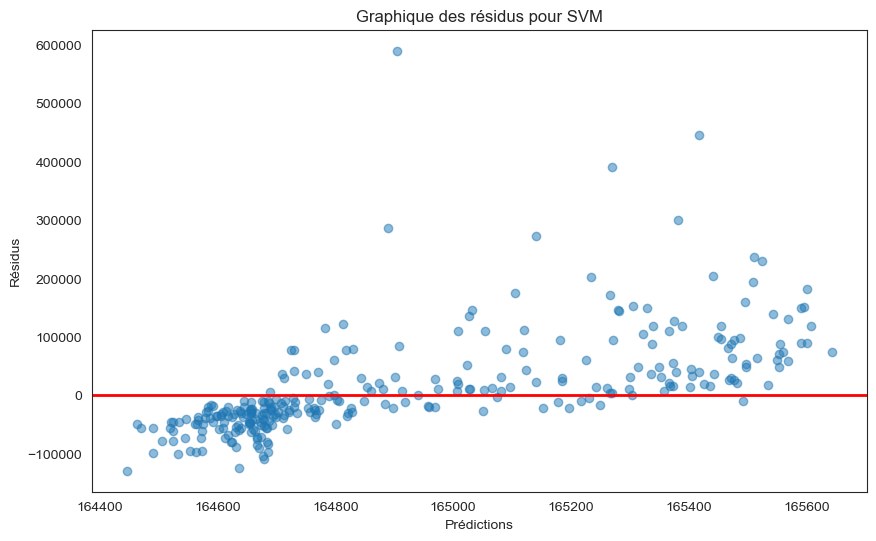

In [275]:
# Tracé du graphique des résidus pour SVM
plt.figure(figsize=(10, 6))
plt.scatter(svm_predictions_val, svm_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Graphique des résidus pour SVM')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

Le graphique des résidus pour le modèle SVM indique une bonne répartition aléatoire des erreurs, sans biais apparent, et une variance constante des erreurs par rapport aux prédictions, ce qui est positif pour l'homoscédasticité(L'homoscédasticité est une propriété des résidus (erreurs de prédiction) dans un modèle de régression, où la variance des résidus est la même pour toutes les valeurs prédites du modèle. En d'autres termes, cela signifie que la dispersion ou l'étalement des résidus est constant sur toutes les valeurs de l'axe horizontal (les prédictions), indiquant que le modèle est également précis sur l'ensemble de la plage des données). Cependant, la présence de certains résidus éloignés de la ligne zéro suggère des valeurs aberrantes qui pourraient affecter la qualité des prédictions.

## Random Forest

In [276]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du modèle Random Forest avec recherche des hyperparamètres optimaux
random_forest = RandomForestRegressor(random_state=42)
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(random_forest, params_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train_split, y_train_split)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [277]:
# Meilleurs paramètres pour Random Forest
best_n_estimators_rf = grid_rf.best_params_['n_estimators']
best_max_depth_rf = grid_rf.best_params_['max_depth']
best_min_samples_split_rf = grid_rf.best_params_['min_samples_split']
best_min_samples_leaf_rf = grid_rf.best_params_['min_samples_leaf']
print(f"Meilleurs paramètres pour Random Forest - "
      f"n_estimators: {best_n_estimators_rf}, "
      f"max_depth: {best_max_depth_rf}, "
      f"min_samples_split: {best_min_samples_split_rf}, "
      f"min_samples_leaf: {best_min_samples_leaf_rf}")

Meilleurs paramètres pour Random Forest - n_estimators: 100, max_depth: 20, min_samples_split: 5, min_samples_leaf: 2


In [278]:
# Entraînement du modèle Random Forest avec les meilleurs paramètres
rf_model = RandomForestRegressor(n_estimators=best_n_estimators_rf,
                                 max_depth=best_max_depth_rf,
                                 min_samples_split=best_min_samples_split_rf,
                                 min_samples_leaf=best_min_samples_leaf_rf,
                                 random_state=42)
rf_model.fit(X_train_split, y_train_split)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [279]:
# Évaluation du modèle Random Forest sur l'ensemble de validation
rf_predictions_val = rf_model.predict(X_val_split)
rf_rmse = np.sqrt(mean_squared_error(y_val_split, rf_predictions_val))
print(f'RMSE pour Random Forest sur l\'ensemble de validation : {rf_rmse}')

RMSE pour Random Forest sur l'ensemble de validation : 29299.75618911941


In [280]:
X_test_scaled = scaler.transform(df2)
# Prédictions sur l'ensemble de test
predictions_test = rf_model.predict(X_test_scaled)
# Création d'un DataFrame pour les prédictions avec un identifiant unique
sample_submission_df = pd.DataFrame({'Id': df2_ID['Id'], 'SalePrice': predictions_test})
# Sauvegarde du fichier de soumission
sample_submission_df.to_csv('C:/Users/alain/Downloads/ProjetML/sample_submission_rf.csv', index=False)

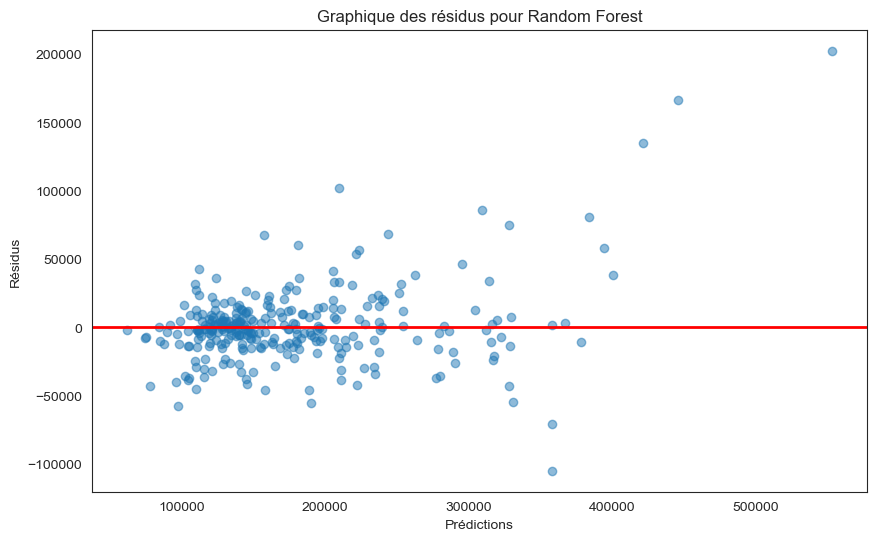

In [281]:
# Calcul des résidus pour Random Forest
rf_residuals = y_val_split - rf_predictions_val

# Tracé du graphique des résidus pour Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions_val, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Graphique des résidus pour Random Forest')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

Le graphique des résidus pour le modèle de forêt aléatoire montre une bonne répartition des erreurs autour de la ligne de zéro, indiquant l'absence de biais systématique dans les prédictions. L'homogénéité de la dispersion des résidus suggère que le modèle a une variance constante des erreurs, ce qui est une indication d'homoscédasticité. Quelques résidus éloignés pourraient indiquer des valeurs aberrantes ou des erreurs spécifiques à certaines prédictions.

###### Le modèle avec le plus faible RMSE est préféré car il indique la plus petite erreur de prédiction moyenne. D'après les valeurs fournies, le modèle Random Forest a le RMSE le plus faible et serait donc considéré comme le meilleur modèle parmi ceux évalués ici. Cela suggère que le modèle Random Forest a, en moyenne, les erreurs de prédiction les plus faibles sur l'ensemble de validation utilisé pour ces tests.

## Réalisons la validation croisée sur plusieurs ensembles de validation différents pour confirmer la robustesse du modèle Random Forest

#### Pour la régression Ridge avec validation croisée :

In [282]:
ridge_model = Ridge(alpha=1000.0)
scores = cross_val_score(ridge_model, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-scores)
print(f'Scores de RMSE pour Ridge: {ridge_rmse_scores}')
print(f'Moyenne: {ridge_rmse_scores.mean()}')
print(f'Écart-type: {ridge_rmse_scores.std()}')

Scores de RMSE pour Ridge: [37472.86081303 31655.91914435 46563.48484995 28796.75142409
 27422.53268159]
Moyenne: 34382.30978260245
Écart-type: 7000.038529573638


#### Pour la régression Lasso avec validation croisée :

In [283]:
lasso_model = Lasso(alpha=0.01)
scores = cross_val_score(lasso_model, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
lasso_rmse_scores = np.sqrt(-scores)
print(f'Scores de RMSE pour Lasso: {lasso_rmse_scores}')
print(f'Moyenne: {lasso_rmse_scores.mean()}')
print(f'Écart-type: {lasso_rmse_scores.std()}')

C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+11, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.582e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e+11, toleranc

Scores de RMSE pour Lasso: [32562.9193229  37650.98215519 52269.42038132 36384.55023914
 88088.95166021]
Moyenne: 49391.36475175158
Écart-type: 20474.35869362091


C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.691e+11, tolerance: 5.716e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\alain\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.771e+11, tolerance: 5.796e+08
  model = cd_fast.enet_coordinate_descent(


#### Pour le SVM avec validation croisée :

In [284]:
svm_model = SVR(C=1, epsilon=0.01)
scores = cross_val_score(svm_model, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
svm_rmse_scores = np.sqrt(-scores)
print(f'Scores de RMSE pour SVM: {svm_rmse_scores}')
print(f'Moyenne: {svm_rmse_scores.mean()}')
print(f'Écart-type: {svm_rmse_scores.std()}')


Scores de RMSE pour SVM: [84355.45484662 76672.83318906 86009.64972362 74343.65213083
 72763.8652617 ]
Moyenne: 78829.09103036394
Écart-type: 5360.162195333379


#### Pour le Random Forest avec validation croisée :

In [285]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2)
scores = cross_val_score(rf_model, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-scores)
print(f'Scores de RMSE pour Random Forest: {rf_rmse_scores}')
print(f'Moyenne: {rf_rmse_scores.mean()}')
print(f'Écart-type: {rf_rmse_scores.std()}')

Scores de RMSE pour Random Forest: [31267.88307737 35498.32845616 37188.30831513 25347.39164595
 24900.7323746 ]
Moyenne: 30840.52877384327
Écart-type: 5052.282087462176


Le Random Forest a un faible écart-type, ce qui signifie que le modèle est stable et performe de manière similaire sur différents sous-ensembles des données
La Moyenne de ce modèle (RF) est la plus basse, on peut en déduire que ce modèle a la meilleure performance générale en termes de précision des prédictions

##### GROUPE 1: MELISSA, ALAIN, JOVICK
##### PSEUDO KAGGLE: jovick fotsing
#### SCORE (RMSE): 0,15648
#### LE NOMBRE DE SOUMISSIONS: 4